# 0. Import Data and Preprocessing

In [1]:
import sklearn
sklearn.__version__

'0.23.2'

In [2]:
import time



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
np.__version__,pd.__version__

('1.16.5', '0.25.1')

In [5]:
train=pd.read_csv("new_data.csv")
test=pd.read_csv("test_set.csv")

In [6]:
train=pd.DataFrame(train)
test=pd.DataFrame(test)

In [7]:
train.shape,test.shape

((30904, 21), (20586, 21))

In [8]:
target=['winner']
unrelated=['gameId','gameDuration','seasonId']

In [9]:
train_features=train.drop(target,axis=1)
train_features=train_features.drop(unrelated,axis=1)
train_labels=train[target]

test_features=test.drop(target,axis=1)
test_features=test_features.drop(unrelated,axis=1)
test_labels=test[target]

In [10]:
train_features.shape

(30904, 17)

In [11]:
train_features

,creationTime,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
0,1.504280e+12,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1
1,1.497850e+12,1,1,1,0,1,1,10,4,0,2,1,2,0,0,0,0
2,1.504360e+12,2,1,1,1,2,0,8,1,1,1,0,2,0,0,1,0
3,1.504350e+12,1,1,1,1,1,0,9,2,1,2,0,0,0,0,0,0
4,1.504550e+12,2,1,1,1,1,0,9,2,1,3,0,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30899,1.500570e+12,2,2,2,2,1,0,3,0,0,1,0,11,3,1,2,0
30900,1.504490e+12,1,1,1,1,1,0,8,1,1,2,0,2,0,0,0,0
30901,1.501880e+12,1,2,2,2,2,2,0,0,0,0,0,11,2,1,2,1
30902,1.501770e+12,1,1,1,2,2,1,7,1,1,0,1,4,0,1,3,0


In [12]:
train_labels.shape

(30904, 1)

In [13]:
test_features.shape

(20586, 17)

In [14]:
test_labels.shape

(20586, 1)

# 1.Train Different Models
## a.Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [16]:
dt=DecisionTreeClassifier(criterion='gini',splitter='best')

In [17]:
time_start=time.time()


dt.fit(train_features,train_labels)

time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 0.12665867805480957 s


In [18]:
dt_pred = dt.predict(test_features)

In [19]:
test_labels=test_labels.values

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(test_labels,dt_pred)

0.9611872146118722

In [22]:
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=['creationTime','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald','t1_towerKills','t1_inhibitorKills','t1_baronKills','t1_dragonKills','t1_riftHeraldKills','t2_towerKills','t2_inhibitorKills','t2_baronKills','t2_dragonKills','t2_riftHeraldKills'],class_names=['1 win','2 win'],filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render()

'Source.gv.pdf'

D:\anaconda\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Feature ranking:
1. feature t2_towerKills (0.241728)
2. feature t1_towerKills (0.208507)
3. feature firstInhibitor (0.153350)
4. feature t1_inhibitorKills (0.083066)
5. feature t2_inhibitorKills (0.081228)
6. feature firstBaron (0.035274)
7. feature firstTower (0.033729)
8. feature t1_dragonKills (0.032117)
9. feature t2_dragonKills (0.030585)
10. feature creationTime (0.025952)
11. feature t2_baronKills (0.019391)
12. feature t1_baronKills (0.019244)
13. feature firstDragon (0.014136)
14. feature firstBlood (0.007023)
15. feature t2_riftHeraldKills (0.006123)
16. feature t1_riftHeraldKills (0.004616)
17. feature firstRiftHerald (0.003931)


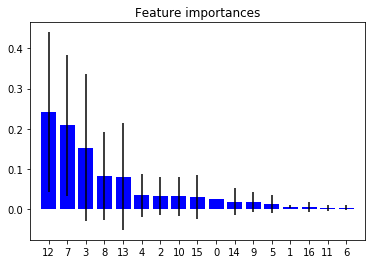

In [23]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

feature_names=['creationTime','firstBlood','firstTower',
               'firstInhibitor','firstBaron','firstDragon',
               'firstRiftHerald','t1_towerKills','t1_inhibitorKills',
               't1_baronKills','t1_dragonKills','t1_riftHeraldKills',
               't2_towerKills','t2_inhibitorKills','t2_baronKills',
               't2_dragonKills','t2_riftHeraldKills']
# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(train_features, train_labels)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_features.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(np.array(range(train_features.shape[1])), importances[indices],
        color="b", yerr=std[indices], align="center")
plt.xticks(range(train_features.shape[1]), indices)
plt.xlim([-1, train_features.shape[1]])
plt.show()

In [24]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from matplotlib import pyplot as plt

In [25]:
proba = dt.predict_proba(test_features)

In [26]:
proba.shape

(20586, 2)

In [27]:
proba_score=[]
for i in range(0,len(proba)):
    if test_labels[i]==1:
        proba_score.append(proba[i,0])
    else:
        proba_score.append(proba[i,1])

In [28]:
proba_score = np.array(proba_score)
proba_score

array([0.5, 1. , 1. , ..., 1. , 1. , 1. ])

In [29]:
test_labels.reshape(len(test_labels))

array([2, 1, 2, ..., 2, 2, 1], dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

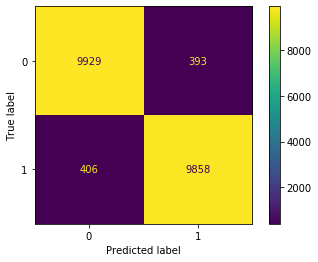

In [31]:
cm=confusion_matrix(test_labels,dt_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [32]:
from sklearn.metrics import f1_score

In [33]:
f1_score(test_labels,dt_pred)

0.9613206177082829

## b.SVC

In [34]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [35]:
svc = make_pipeline(StandardScaler(), SVC(gamma='auto',probability=True))
time_start=time.time()
svc.fit(train_features, train_labels)
time_end=time.time()
print('time cost',time_end-time_start,'s')

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


time cost 52.39783716201782 s


In [36]:
svc_pred=svc.predict(test_features)

In [37]:
svc.score(test_features,test_labels)

0.9706110949188769

In [38]:
f1_score(test_labels,svc_pred)

0.9708419682876283

## c.MLP

In [39]:
from sklearn.neural_network import MLPClassifier

In [40]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10),activation='tanh',max_iter=1000,solver='lbfgs', alpha=1e-5,random_state=1)

In [41]:
start = time.time()
mlp.fit(train_features,train_labels)
end = time.time()
print(end-start)

0.13064980506896973


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [42]:
mlp_pred=mlp.predict(test_features)

In [43]:
mlp.score(test_features,test_labels)

0.5014087243757893

In [44]:
f1_score(test_labels,mlp.predict(test_features))

0.667917691212631

## c' MLP with Standarization

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()  # doctest: +SKIP
# Don't cheat - fit only on training data
scaler.fit(train_features)  # doctest: +SKIP
X_train = scaler.transform(train_features)  # doctest: +SKIP
# apply same transformation to test data
X_test = scaler.transform(test_features)  # doctest: +SKIP

In [47]:
time_start=time.time()
mlp.fit(X_train,train_labels)
time_end=time.time()
print('time cost',time_end-time_start,'s')

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


time cost 29.75644278526306 s


D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [48]:
mlp.score(X_test,test_labels)

0.9675993393568445

In [49]:
mlp_pred = mlp.predict(X_test)

In [50]:
f1_score(test_labels,mlp_pred)

0.9675851679059144

# 2. Ensemble of Model

In [51]:
dt_pred

array([1, 1, 2, ..., 2, 2, 1], dtype=int64)

In [52]:
svc_pred

array([1, 1, 2, ..., 2, 2, 1], dtype=int64)

In [53]:
mlp_pred

array([2, 1, 2, ..., 2, 2, 1], dtype=int64)

In [54]:
_1 = 0
_2 = 0
final_pred = []
#Initialization

for i in range(0,len(dt_pred)):
    #Go through all results
    #
    if dt_pred[i]==1:
        _1+=1
    if dt_pred[i]==2:
        _2+=1
            
    if svc_pred[i]==1:
        _1+=1
    if svc_pred[i]==2:
        _2+=1
            
    if mlp_pred[i]==1:
        _1+=1
    if mlp_pred[i]==2:
        _2+=1
    
    if _1>=_2:
        #Comparison between votes of 1win and 2win
        final_pred.append(1)
    else:
        final_pred.append(2)
            
    _1=0
    _2=0
    #After each cycle, clear the number of votes.

In [55]:
final_pred = pd.DataFrame(final_pred)

In [56]:
final_pred

,0
0,1
1,1
2,2
3,1
4,1
...,...
20581,2
20582,2
20583,2
20584,2


In [57]:
error = test_labels - final_pred

In [58]:
ensemble_score = 1-np.sum(np.abs(error))/len(error)

In [59]:
print("The accuracy of ensembled model is %f",ensemble_score)

The accuracy of ensembled model is %f 0    0.970757
dtype: float64


In [60]:
f1_score(test_labels,final_pred)

0.9708813001838058